# Homework 1: Probability Distributions and Maximum Likelihood

## Question 1: Probability

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as path
from scipy import optimize
from mpl_toolkits import mplot3d
import scipy.integrate as integrate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

#### a) Suppose that we know the following probabilities about tomorrow's weather:
$P(\textrm{sunny}) = 0.5$

$P(\textrm{windy}) = 0.3$

$P(\textrm{sunny & windy}) = 0.1$

You're planning a big ski outing with your friends and know that it's going to be sunny. Given that it will be sunny tomorrow, what is the probability that it will _not_ be windy? 

$1-P(windy|sunny)= 0.8$

#### b) You are given two bags of colored balls, one has 75% red balls and 25% green balls, and the other has 75% green balls and 25% red balls.

##### i) You take a bag at random, what is the probability you chose the bag with more red balls?

**P(bags with more red balls)=0.5**

##### ii) Now you reach in and at random draw a red ball out of the bag - what is the probability you have the bag with more red balls?

**P(bags with more red balls|red ball)= P(red ball| bags with more red balls)* P(bags with more read ball)/P(red ball)**

**P(red ball)= (P(red ball & bag1)+ P(red ball & bag2))= 0.5**

**P(bags with more red balls|red ball)= 0.75 * 0.5 / 0.5 =0.75**

#### c) $X_1, X_2, \dots, X_k$ are all distributed Uniform(0, 1). Find the distribution of $Y = \sum_{i=1}^{k}-\log(X_i)$.

Xi is unformly distributed, therefore P(x)=1

$\log(x) = \log(1/2)$

$-\log(x) = -\log(1/2)$

$\sum_{i=1}^{k}-\log(x) = -k\log(1/2)$

$P(y)= -y \log(1/2)$


## Question 2: The Normal Distribution with Known Variance

Suppose that you measure the heights of 6 maple trees, and find them to be 26, 28, 29, 31, 34, and 37 meters tall (we'll say your data is $\mathbf x  = [28, 28, 29, 31, 34, 37]$). You know that maple tree height is normally distributed with a variance of 5 meters, but you don't know the mean.

#### a) Write down the likelihood and log-likelihood (up to a constant) of the mean parameter of the height distribution as a function of your sampled data.

$ P(D|\mu) = \prod_{i=1}^{6}\frac{1}{\sqrt{2\pi\sigma^{2}}}$
$ e^{\frac{-1}{2\sigma^{2}}({x_i-\mu})^{2}}$

$ \log (P(D|\mu))= -3\log(2\pi\sigma^{2})-\frac{1}{2\sigma^{2}}\sum_{i=1}^{6}({x_i-\mu})^{2}$ 

#### b) Plot the (negative) log-likelihood as a function of $\mu$ ranging from 25 to 35

Below the plot explain in words what the resulting curve represents.

In [18]:
x_arr = np.array([28,28,29,31,34,37])
def objective(mu):
    return -(-3*np.log(2*np.pi*5)- 0.1*np.sum((x_arr - mu)**2))
bounds1= ((0, 60),)
sol = optimize.minimize(objective, x0=30, bounds = bounds1)
print (sol.x)
print (objective(35))
print (objective (sol.x))
x = np.linspace(25, 35, 100)
##fig, ax = plt.subplots(figsize=(20,5))



[31.16666667]
25.84194493653034
17.025278269863673


In [19]:
def f(x):
    sum =0
    for i in x_arr:
        sum =sum + (i-x)**2
    return -(-3*np.log(2*np.pi*5)- 0.1*sum)

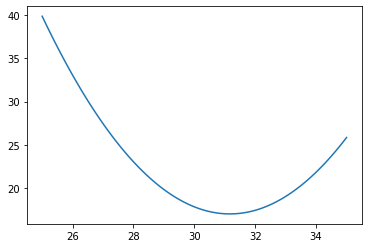

In [20]:
plt.plot(x,f(x))

**The plot shows that this gaussian distribution best fit the training data when the negative log likelihood function achieve its maximum(MLE)**

#### c) Find (analytically) the MLE of the mean height of maple trees and compute the estimate for our data.

**negative log likelihood  is 17.025278269863673 when the  the gaussian distribution has the mean 31.16666667 and variance 5.**

#### d) Estimate the MLE numerically

Use a numerical method to minimize your negative log-likelihood function with an initial guess of 25 --- does your result agree with your answer above?

Plot the negative log-likelihood along with the iterations of your optimizer.

$ \log (P(D|25))= -3\log(2\pi\times 5)-\frac{1}{2\times 5}\sum_{i=1}^{6}({x_i-25})^{2} = 39.84194493653034$

$ \log (P(D|28))= -3\log(2\pi\times 5)-\frac{1}{2\times 5}\sum_{i=1}^{6}({x_i-28})^{2}  = 23.04194493653034$

$ \log (P(D|31))= -3\log(2\pi\times 5)-\frac{1}{2\times 5}\sum_{i=1}^{6}({x_i-31})^{2}  = 17.04194493653034$ 

$ \log (P(D|33))= -3\log(2\pi\times 5)-\frac{1}{2\times 5}\sum_{i=1}^{6}({x_i-33})^{2}  = 19.04194493653034$ 

$ \log (P(D|35))= -3\log(2\pi\times 5)-\frac{1}{2\times 5}\sum_{i=1}^{6}({x_i-35})^{2}  = 25.84194493653034$ 


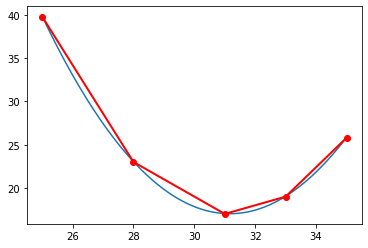

In [21]:
vertices= np.array([[39.84194493653034,25],[23.04194493653034,28],[17.04194493653034,31],[19.04194493653034,33],[25.84194493653034,35]])
x1=np.array([25,28,31,33,35])
y1=np.array([39.8,23,17,19,25.8])
plt.plot(x1,y1, c='red', linewidth=2.0, marker='o', zorder=10)
plt.plot(x,f(x))


**The reults of numerical estimates agree with the results from the MLE**

## Question 3: The (Biased) Coin

Your friend shows you a very odd looking coin, and you two want to figure out if it is biased or not.

#### a) The Observation Model

Assume you flip the coin $N$ times and get $n_h$ heads and $n_t = N - n_h$ tails. Choose an appropriate distribution and down the likelihood for $p$, the probability of flipping a heads with this coin.

$
P(X|n_h,p) = \binom{N}{n_h}p^{n_h}(1-p)^{N-n_h}
$

#### b) Use the log-likelihood to find a formula for the MLE for $p$. 
Provide an interpretation for this result.

$\log P(X|n_h,p)= log(\binom{N}{n_h}) + n_h\log(p)+(N-n_h)\log(1-p)$

**take the derivative of the log likelihood function and set it to 0, then we get**


$\hat{p}=\frac{n_h}{N}$

**which means that when the probability is the mean of the sample, the distribution is most likely to generate the sample**


#### c) An Interesting Case

Suppose you flip the coin 3 times and observe HHH (3 heads in a row). What is the MLE for $p$? Does this make sense with your intuitions?

$\hat{p}=\frac{3}{3}=1$

**The result does not make sense because it predicts that the coin has 100 percent of chance landing on head**

## Question 4: Rainfall and a Joint MLE

We have a (synthetic) dataset of 1000 days of positive precipitation in measured in NYC in mm, attached in the `rain.npy` file. In this question we will work through modeling this data analytically and numerically, and simulating new data to determine risks for the city.

#### a) The Likelihood Function

Assuming a Gamma distribution, write down the likelihood and log likelihood functions of the shape and scale parameters. Solve for the MLE of the shape and scale parameters. You can leave your answer for the shape parameter in terms of the Digamma function.

$
p(x|k,\theta) = \prod_{i=1}^{n}\frac{1}{\Gamma(k)\theta^k}x_i^{k-1}e^{-\frac{x_i}{\theta}}
$

$
\log( p(x|k,\theta) ) = -nk\log (\theta)- n\log\Gamma(k)- \frac{1}{\theta}\sum_{i=1}^{n}x_i + (k-1)\sum_{i=1}^{n}\log(x_i)
$

#### B) Joint optimization of the MLE

In the previous part we saw that we can't get a closed form for the joint MLE of the Gamma distribution (hint hint!). For this part (i) define a function for the _negative_ log likelihood and make a surface plot for values of $k \in [1., 15]$ and $\theta \in [1., 15]$ using the attached data.

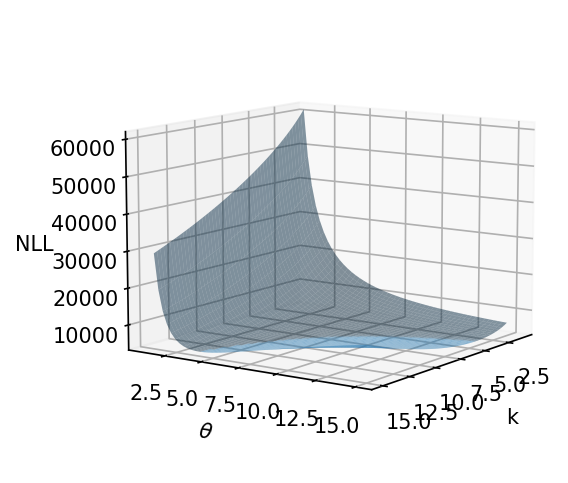

In [28]:
from scipy.special import gamma

data = np.load("./rain.npy")
def f(k,theta):
    return -(-1000*k*np.log(theta)-1000*np.log(gamma(k))-(1/theta)*np.sum(data)+(k-1)*np.sum(np.log(data)))

def objective_gamma(pars) :
     return -(-1000*pars[0]*np.log(pars[1])-1000*np.log(gamma(pars[0]))-(1/pars[1])*np.sum(data)+(pars[0]-1)*np.sum(np.log(data)))
k = np.linspace(1, 15)
theta = np.linspace(1, 15)

agrid, bgrid = np.meshgrid(k, theta)
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
fa = f(agrid, bgrid)
ax.plot_surface(agrid, bgrid, fa , alpha=0.5)
ax.set_xlabel(r'k')
ax.set_ylabel(r'$\theta$')
ax.set_zlabel('NLL')
ax.view_init(10, 35)

#### C) Numerical Estimates

Since we can't get a closed form estimate but we can define a negative log-likelihood function in python, use `scipy.minimize` to compute estimates of $k$ and $\theta$.

Plot the solution of the optimizer on the surface plot of the NLL you generated above - does it seem reasonable? 

[10.11831237  6.01367313]


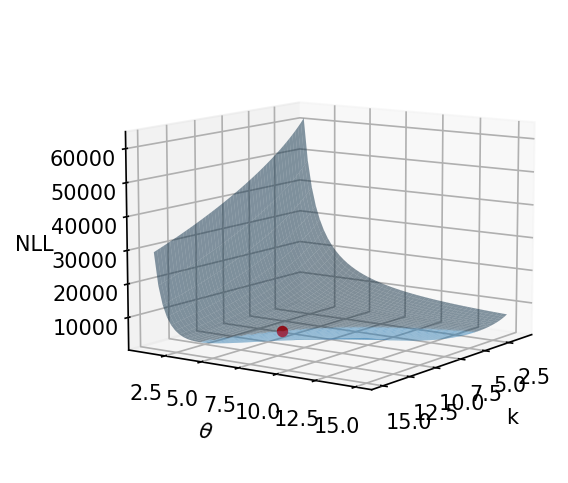

In [23]:
bounds1=(1.0,15.0)
boundsa=(bounds1, bounds1)
sol1 = optimize.minimize(objective_gamma, x0=np.array([7,7]), bounds = boundsa)
print (sol1.x)


fig = plt.figure(dpi=150)
bx = plt.axes(projection='3d')
bx.plot_surface(agrid, bgrid, fa , alpha=0.5)
bx.set_xlabel(r'k')
bx.set_ylabel(r'$\theta$')
bx.set_zlabel('NLL')
bx.scatter(sol1.x[0], sol1.x[1], objective_gamma (sol1.x), color='red')
bx.view_init(10, 35)


***The solution does seem reasonable, since it is th minimal value of the negative lof likehood function***

#### D) Risk Projection

We now have a model of rainfall in NYC! Suppose that any day where it rains over 100mm is a rain event for which the city's flood resources become stressed. Simulate 100,000 days of rainfall with your model - how many times do you see over 100mm of rain? How worried should city officials be? 

**Answer Here**
The predictive model is a gamma distribution with $k =10.11831237 , \theta = 6.01367313$

$P(x>=100|k,\theta)=  \int_{100}^{\infty} \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}} \,dx $

In [24]:
positive_infnity = float('inf') 
par= np.array([10.11831237,6.01367313])
def distri(x):
    return (1/(gamma(par[0])*(par[1]**par[0])))*x**(par[0]-1)*(np.e**(-x/par[1]))
I, err = integrate.quad(distri, 100 ,positive_infnity)
print(I)

0.03415109134848588


$P(x>=100|k,\theta)= 0.03415109134848588$

***Given 100,000 days of rainful, the model predicts that in 3415.1 out of 100,000 days of rainfall the city would see over 100mm of rain. I don't think the city offical should be worried too much given that NYC does not see rainfall day very frequently, not to mention that only 3% of those days we would observe over 100mm of rain.***

## Question 5: Consistency of Regression Models

Suppose we have a collection of data $\mathcal{D} = \left\{(x_i, y_i) \right\}_{i=1}^{n}$ and we want to learn the regression model
$$
y = ax + \epsilon
$$
with $\epsilon \sim N(0, \sigma^2)$.

### a) The Log Likelihood

Derive the log likelihood for the whole dataset, $\log p(\mathbf{y} | \mathbf{x}, a , \sigma^2)$

$ \log (p(y|x,a,\sigma^{2}))= -\frac{n}{2}\log(2\pi\sigma^{2})-\frac{1}{2\sigma^{2}}\sum({y_i-ax_i})^{2}$ 

### b) The MLE for $a$

Now find the MLE for $a$.

$\frac{\partial f}{\partial a}=\frac{\sum x_iy_i-ax_i^{2}}{\sigma^{2}}$

$\hat{a}=\frac{\sum x_iy_i}{\sum x_i^{2}}$


### c) A new MLE

Suppose we instead consider the model
$$
x = by + \epsilon
$$

Is the maximum likelihood solution $b=1/a$? Explain why.

***No, for the sake of contradicion, we set b=1/a and plug the value into the equation which turns into $x=\frac{1}{a}y+ \epsilon $. We rearrange the equation 
and get $y = ax - a\epsilon$ which is different from $ y = ax + \epsilon$. Therefore, the statement is false.***

## Question 6: Regularizing Regression

In this question we'll explore finding a regularization parameter $\lambda$ for a simple regression problem. First Load in the `regression_data.npz` file and extract the training and testing data.

In [25]:
data = np.load("./regression_data.npz")
x_train , y_train = data['x_train'], data['y_train']
x_test , y_test = data['x_test'], data['y_test']
x_train= np.reshape(x_train,(-1,1))
print(x_train)
x_test= np.reshape(x_test,(-1,1))
#y_train= np.reshape(y_train,(-1,1))
#y_test= np.reshape(y_test,(-1,1))


[[3.85973726]
 [0.97907281]
 [0.55708356]
 [1.94472822]
 [1.66638588]
 [0.69604979]
 [3.99899324]
 [1.53899965]]


### a) A simple linear model

Fit a linear regression to the training data of the form
$$
y = \sum_{i=0}^{10}\beta_i x^{i} + \epsilon
$$
with $\epsilon \sim N(0, \sigma^2)$.

Generate predictions on for the test inputs. Plot the model fit - how is it?

$ \log (p(y|x,a,\sigma^{2}))= -\frac{n}{2}\log(2\pi\sigma^{2})-\frac{1}{2\sigma^{2}}\sum({y_i-\sum_{i=0}^{10}\beta_i x^{i}})^{2}$ 

[-24165.2853091   35569.87140151  -8912.0366305  -28313.80255663
  32106.40298988 -14462.11438914   2991.96082247   -233.74023512]


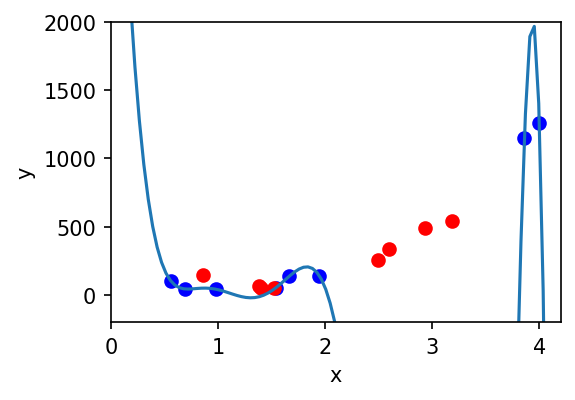

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#def objective (a, sigma):
#    return -4*np.log(22*mp.pi*sigma**2)-(1/2)*sigma**2*np.sum(y_train-poly(x_train,w))    


lm = LinearRegression()
x_ = PolynomialFeatures(degree=8, include_bias=False).fit_transform(x_train)#tansform data into shape [n:8]
model = lm.fit(x_, y_train)

def pol_y(x):
        y = model.intercept_ 
        power = 1
        for i in model.coef_:
            y += i*(x**power)
            power += 1
        return y
print(model.coef_)
fig = plt.figure(dpi=150)
axes1= fig.add_axes([0.1,0.1,0.5,0.5])

axes1.set_xlim([0,4.2])
axes1.set_ylim([-200,2000])
axes1.set_ylabel("y")
axes1.set_xlabel("x")
x = np.linspace(0.1, 4.2, 100)
plt.plot(x,pol_y(x))
plt.scatter(x_train,y_train, color= "blue", label='training data')
plt.scatter(x_test,y_test, color= "red", label='tesing data')

**The prediction runs perfectly through the training data but generalizes badly for the test data**

b) Cross-Validation

Using leave one out cross validation find an optimal regularization parameter to use for a ridge regression by applying grid search for 10000 values of $\alpha \in [1, 500]$. 

What do you notice when you go to run your code?

In [27]:
arr_lambda= np.arange(1, 500 ,0.05)
clf = RidgeCV(alphas=arr_lambda).fit(x_, y_train)
clf.set_params(fit_intercept=True)

print(clf.alpha_)
print(clf.intercept_)
print(coeff_r2)
clf.get_params(deep=True )

def pol_y2(x):
        y = clf.intercept_ 
        power = 1
        for i in coeff_r2:
            y += i*(x**power)
            power += 1
        return y

2.0500000000000007
68.1414962547999


NameError: name 'coeff_r2' is not defined

**The optimal regularization parameter to use in this case is 2.05 which generates coefficnets**

**[-4.25511332 -4.87863953 -3.10134625  0.13516154  3.30612251  3.52325712 -1.91705864  0.22951497],**

**and y-intercept 68.1414962547999.**

**The coefficient of the prediction after adding the r2 regularizer is a lot smaller than before**

### c) Now Use Your Cross-Validated Regularization Parameter to Generate Predictions. How Are they? 

In [ ]:
    
fig2 = plt.figure(dpi=150)
axes2= fig2.add_axes([0.1,0.1,0.5,0.5])
axes2.set_xlim([0,4.2])
axes2.set_ylim([-200,2000])
axes2.set_ylabel("y")
axes2.set_xlabel("x")
x2 = np.linspace(0.1, 4.2, 100)
plt.plot(x2,pol_y2(x2))
plt.scatter(x_train,y_train, color= "blue", label='training data')
plt.scatter(x_test,y_test, color= "red", label='tesing data')

**The regularized prediction now generalizes better to the test data.**

## Question 7:  Linear Regression with a Prior

### a) Posterior distribution
Consider the linear model

$$
y_i = {\bf w}^T {\bf x}_i + \epsilon_i
$$

where the noise $\epsilon_i \sim N(0, \sigma^2)$ are i.i.d.  Our goal is to infer the weight vector ${\bf w} \in \mathbb{R}^p$ given $n$ training data points $\{({\bf x}_i, y_i)\}_{i=1}^n$.  Assume the prior distribution over ${\bf w}$ is a multivariate Gaussian distribution $N({\bf v}, {\boldsymbol \Gamma})$ where ${\bf v} \in \mathbb{R}^p$ and ${\boldsymbol \Gamma}\in \mathbb{R}^{p\times p}$.  Denote the training data matrix ${\bf X} = [{\bf x}_1, \ldots, {\bf x}_n]^T \in \mathbb{R}^{p\times n}$ and the vector of training labels ${\bf y} = [y_1,\ldots,y_n]^T \in \mathbb{R}^n$.



Derive the posterior distribution $p({\bf w} | {\bf X}, {\bf y})$ (up to a normalizing constant that doesn't depend on ${\bf w}$) for the parameters ${\bf w}$ given the $n$ training points.

$p(w)=\frac{1}{\sqrt{(2\pi)^{p}\det{\boldsymbol \Gamma}}}e^{\frac{-1}{2}(\bf w-\bf v)^{T}\boldsymbol \Gamma^{-1}(\bf w-\bf v)}$

$ p(y|X, w) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{\frac{-1}{2\sigma^{2}}({y_i-w^{T} x_i})^{2}} =\frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}e^{\frac{-1}{2\sigma^{2}}(\|y-Xw\|)^{2}}$

$p(w|X,y)=\frac{\frac{1}{(2\pi\sigma^{2})^{\frac{n}{2}}}e^{\frac{-1}{2\sigma^{2}}\|y-Xw\|^{2}}\times \frac{1}{\sqrt{(2\pi)^{p}\det{\boldsymbol \Gamma}}}e^{\frac{-1}{2}(\bf w-\bf v)^{T}\boldsymbol \Gamma^{-1}(\bf w-\bf v)}}{p(y)}$

while p(y) acts like a normalizing constant.


### b) MAP estimation vs. loss minimization

Recall that for linear regression we are minimizing a loss function

$$
L({\bf w}) = \sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2
$$

and that this corresponds to maximizing the log-likelihood $\log p({\bf y}|{\bf X},{\bf w})$.  Answer the following two questions:

1.  Show that minimizing the regularized loss function

$$
L_{\lambda}({\bf w}) = \lambda \|{\bf w} - {\bf v}\|^2 + \sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2
$$

corresponds to finding the maximizer of the posterior distribution (maxiumum a posteriori or MAP estimator)

$$
{\bf w}^* = \underset{{\bf w} \in \mathbb{R}^p}{\mathrm{argmax}}\ p({\bf w} | {\bf X} , {\bf y})
$$

when the prior distribution for ${\bf w}$ is a Gaussian $N({\bf v}, {\gamma^2} {\bf I})$, where ${\bf I} \in \mathbb{R}^{p\times p}$ is the identity matrix and $\gamma > 0$.  

2.  What is the relation between $\lambda$, $\sigma^2$, and $\gamma^2$?  In particular, what does mean for the loss function if the prior distribution is very concentrated around the mean ${\bf v}$ (i.e. $\gamma$ is close to 0)?


$\log (p(w|X,y))=-\frac{n}{2}\log(2\pi\sigma^{2})-\frac{1}{2\sigma^{2}}\|y-Xw\|^{2}-\frac{1}{2}\log((2\pi)^{p}\det{\boldsymbol \Gamma})$
$-\frac{1}{2}(\bf w-\bf v)^{T}\boldsymbol \Gamma^{-1}(\bf w-\bf v)- \log(p(y))$

while the first, third, and fifth terms is constant

$\frac{\partial p}{\partial w}= -(\frac{1}{2\sigma^{2}}\|y-Xw\|^{2})^{\prime}- (\frac{1}{2}(\bf w-\bf v)^{T}\boldsymbol \Gamma^{-1} (\bf w-\bf v))^{\prime}= -\frac{1}{\sigma^{2}}\sum x_i(w^{T}x_i-y_i)-({\gamma^2} {\bf I})^{-1}\sum(\bf w-\bf v)$

$L_{\lambda}({\bf w}))^{\prime} = (\lambda \|{\bf w} - {\bf v}\|^2)^{\prime} + (\sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2)^{\prime}=2\lambda \sum (w-v)+2\sum x_i(w^{T}x_i-y_i)$



Since $\lambda$ and the covariance matrix $({\gamma^2} {\bf I})^{-1}$ are constant, and they are both positive but the sign of two equation are opposite, therefore, maximizing posterior distribution is the same o

If the prior distribution is very concentrated around the mean v, the lambda would be very bi, tghe regularized loss function will look more like a will mostly generated W^ that corresponds to the concentrated v.

### c) Deriving the MAP estimator

Derive the minimizer of the regularized loss function ${\bf w}^* = \underset{{\bf w} \in \mathbb{R}^p}{\mathrm{argmin}}\ L_{\lambda}({\bf w})$ by setting the gradient to be zero and solving.  Hint: your solution should be of the form ${\bf w} = {\bf A}^{-1}{\bf b}$ for some matrix ${\bf A}$ and some vector ${\bf b}$.

$L_{\lambda}({\bf w}))^{\prime} = (\lambda \|{\bf w} - {\bf v}\|^2)^{\prime} + (\sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2)^{\prime}$

$(\sum_{i=1}^n ({\bf w}^T {\bf x}_i - y_i)^2)^{\prime}= ({\bf X}{\bf w}-{\bf y})^{T}({\bf X}{\bf w}-{\bf y}))$

$=(({\bf X}{\bf w})^{T}-{\bf y}^{T})({\bf X}{\bf w}-{\bf y})$

$=({\bf w}^{T}{\bf X}^{T}-{\bf y}^{T})({\bf X}{\bf w}-{\bf y})$

$={\bf w}^{T}{\bf X}^{T}{\bf X}{\bf w}-{\bf x}^{T}{\bf X}^{T}{\bf y}-{\bf y}^{T}{\bf X}{\bf w}+{\bf y}^{T}{\bf y}$

$(\lambda \|{\bf w} - {\bf v}\|^2)^{\prime}= \lambda({\bf w}-{\bf v})^{T}({\bf w}{\bf v})$

$=\lambda({\bf w}^{T}-{\bf v}^{T})({\bf w}{\bf v})$

$=\lambda{\bf w}^{T}{\bf w}-{\bf w}^{T}{\bf v}-{\bf v}^{T}{\bf w}+{\bf v}^{T}{\bf v}$

$=\lambda{\bf w}^{T}{\bf w}-2{\bf w}^{T}{\bf v}+{\bf v}^{T}{\bf v}$


$L_{\lambda}({\bf w}))^{\prime} = ({\bf w}^{T}{\bf X}^{T}{\bf X}{\bf w}-{\bf x}^{T}{\bf X}^{T}{\bf y}-{\bf y}^{T}{\bf X}{\bf w}+{\bf y}^{T}{\bf y}+{\bf w}^{T}{\bf w}-2{\bf w}^{T}{\bf v}+{\bf v}^{T}{\bf v})^{\prime}$

$=2{\bf X}^{T}{\bf X}{\bf w}-2{\bf X}^{T}{\bf y}+2\lambda{\bf w}-2\lambda{\bf v}$

set $L_{\lambda}({\bf w}))^{\prime} $ to 0 and we get:

${\bf X}^{T}{\bf X}{\bf w}-{\bf X}^{T}{\bf y}+\lambda{\bf w}-\lambda{\bf v}=0$

${\bf w}^* =({\bf X}^{T}{\bf X}+\lambda{\bf I})^{-1}(\lambda{\bf v}+{\bf X}^{T}{\bf y}) $



### d) Polynomial interpolation

Now you'll implement Bayesian linear regression to fit a high degree polynomial to some noisy data.  Assume that $t_1,\ldots,t_{n}$ are points in the interval $[0,1]$ with $t_i \neq t_j$ for $i \neq j$.  

We wish to approximate some underlying function $f$ with prescibed values $f_i = f(t_i)$ by using polynomial interpolation.  It's a standard fact that we can perfectly interpolate the points using a polynomial of degree $n-1$ or more.  However, if there is noise in our data this will give very poor results.  In particular, we assume that we instead observe
$$
y_i = f_i + \epsilon_i
$$
where the noise $\epsilon_i$ are i.i.d $N(0,\sigma^2)$ random variables.  

We can use a Bayesian approach to help fix this.  Here the parameter ${\bf w} \in \mathbb{R}^{p}$ will denote the coefficients of the polynomial.

$$
w_0 + w_1 t + \cdots + w_{p-1}t^{p-1} = {\bf w}^T \begin{bmatrix} 1\\ t\\ \vdots \\ t^{p-1} \end{bmatrix}
$$

with ${\bf w} = [w_0,w_1,\ldots,w_{p-1}]^T$ (note the change in indexing).  Let the prior distribution for ${\bf w}$ be a multivariate Gaussian of the form $N({\bf v}, \gamma^2 {\bf I})$.

Do the following:

1. Implement `fit()` below which computes the MAP estimator ${\bf w}^*$ using the analytic solution you derived earlier.  Instead of computing a matrix inverse use the Numpy function `np.lingalg.solve()`, which is more numerically stable.  In other words you are solving the system ${\bf A}{\bf w}^* = {\bf b}$.  You may also find the following functions useful: `np.outer()`, `np.power()`.

2. Implement `evaluate()` which evaluates the polynomial at a new sequence of points.


Note: For the special case of polynomial interpolation, the design matrix ${\bf X}$ is also called a Vandermonde matrix where the entries are $(t_i)^j$ for $i=1,\ldots,n$ and $j=0,\ldots,p-1$.

In [ ]:
def fit(t, y, v, gamma, sigma):
    """
    Fit a polynomial of degree p-1 to the noisy data y observed at points t.
    
    Input:
        t: np.ndarray(n,), vector of points t_i in [0,1] with no two points equal
        y: np.ndarray(n,), vector of corresponding observations y_i = f(t_i) + epsilon_i
        v: np.ndarray(p,), mean of the prior distribution for the parameters w
        gamma: float, positive value which determines the covariance of the prior (this is not gamma^2)
        sigma: float, positive value which determines the standard deviation of the noise (this is not sigma^2)
        
    Return:
        w: np.ndarray(p,), vector of fitted polynomial coefficients
    """
    ## TO DO STARTS HERE ##
    
    t=np.reshape(t,(t.shape[0],-1))

    dim= v.shape[0] 
    n=0
    y=np.reshape(y,(y.shape[0],-1))
    v=np.reshape(v,(dim,-1)) 
    X = PolynomialFeatures(degree=dim, include_bias=False).fit_transform(t)#tansform data into shape [n:8]
 #   X= x_2
    n=n+1
    X_T=X.transpose()
    id= np.identity(dim)
    if(gamma==np.inf):
#        A= np.dot(X_T,X)+lam
#        A_inverse=np.linalg.solve(A,np.identity(t.shape[0]))
#        X_inverse=np.linalg.solve(X,np.identity(t.shape[0]))
        X_inverse= np.linalg.lstsq(X, np.identity(t.shape[0]), rcond=None)[0]
        w_unreg=np.dot(X_inverse,y)
        print (type(w_unreg))
        w_unreg= np.reshape(w_unreg,-1)
        return w_unreg
    else:
        gamma_sq_I= gamma*gamma *id
        gsI_inverse= np.linalg.solve(gamma_sq_I, id)
        lam= sigma*sigma * gsI_inverse
        A= np.dot(X_T,X)+lam


        b=np.dot(lam,v) + np.dot(X_T,y)
        w=np.linalg.solve(A, b)
        ## TO DO ENDS HERE ##
#        print(y.shape)
#        print(X_T.shape)
#        print(v.shape)
#        print(lam.shape)
#        print (A.shape)
#        print(b.shape)
        w= np.reshape(w,-1)
        return w


def evaluate(t, w):
    """
    Evaluate the polynomial with coefficients w at the points in t.
    w[0] + w[1]*t + ... + w[p-1]*t^{p-2} + w[p-1]*t^{p-1}

    Input:
        t: np.ndarray(m,), for m >= 1, the points to evaluate the polynomial at
        w: np.ndarray(p,), the coefficients of the polynomial

    Return:
        fvals: np.ndarray(m,), the evaluation of the polynomial at the points t
    """
    fvals =np.zeros(t.shape[0])
    t=np.reshape(t,(t.shape[0],-1))
    
    dim1= w.shape[0]
    p = w.shape[0]
    
    n=0
    s=  np.zeros((t.shape[0],dim1))
    s = PolynomialFeatures(degree=dim1, include_bias=False).fit_transform(t)#tansform data into shape [n:8]
    n=n+1
        
#    print(t[i].shape[0])
    ## TO DO STARTS HERE ##
    j=0
    y_=0.0
    
    for a in s:
        y_=0.0
        power = 1
        for i in w:
            y_ = y_+ (a[power-1]*(i**power))
            power = power+ 1
        fvals[j]= y_
        j=j+1
        


    ## TO DO ENDS HERE ##
    #fvals.remove
    return fvals




### Fitting the polynomial (nothing to do here)

Assume that we have noisy observations $y_i$ from true function $f(t) = t$.  Any polynomial of degree 10 can be fit perfectly to this function without noise.  The two plots below show the regularized (right) and un-regarlized (left) fitted polynomials.  If your implementation is correct then the regularized fit should be a good approximation.

In [ ]:
# Generate noisy observations and fit the polynomial.
n = 50
t = np.random.rand(n)
sigma = 0.5
y = t + sigma**2 * np.random.randn(n)


# Set up the prior mean and variance.
p = 10
v = np.zeros(p)
v[1] = 1
gamma = 0.1

# Compute regularized solution.
w_reg = fit(t, y, v, gamma, sigma)

# Compute un-regularized solution with gamma = infinity
w_unreg = fit(t, y, v, np.inf, sigma)
#print (w_reg)

print (w_unreg)
print (w_reg)

# Plot the results side by side.
tt = np.linspace(0,1,1000)

fig, ax = plt.subplots(1,2)

ax[0].plot(tt, evaluate(tt, w_unreg), lw = 4, label = 'Approximation')
ax[0].plot(tt, tt, 'k--', alpha = 0.7, lw = 4, label = 'Truth')
ax[0].scatter(t, y, color = 'r', label = 'Data')
ax[0].set_title('Un-regularized')
ax[0].legend()
ax[0].grid()

ax[1].plot(tt, evaluate(tt, w_reg), lw = 4, label = 'Approximation')
ax[1].plot(tt, tt, 'k--', alpha = 0.7, lw = 4, label = 'Truth')
ax[1].scatter(t, y, color = 'r', label = 'Data')
ax[1].set_title('Regularized')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()